# Pune House Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset is taken from Kaggle

In [2]:
data = pd.read_csv(r"Pune house data.csv")
data.head()

area_type   availability       size  society total_sqft  bath  \
0  Super built-up  Area         19-Dec      2 BHK  Coomee        1056   2.0   
1            Plot  Area  Ready To Move  4 Bedroom  Theanmp       2600   5.0   
2        Built-up  Area  Ready To Move      3 BHK      NaN       1440   2.0   
3  Super built-up  Area  Ready To Move      3 BHK  Soiewre       1521   3.0   
4  Super built-up  Area  Ready To Move      2 BHK      NaN       1200   2.0   

   balcony   price    site_location  
0      1.0   39.07      Alandi Road  
1      3.0  120.00  Ambegaon Budruk  
2      3.0   62.00       Anandnagar  
3      1.0   95.00            Aundh  
4      1.0   51.00       Aundh Road

### Understanding Dataset

In [3]:
data.shape

(13320, 9)

In [4]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [5]:
data['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
data = data.drop(['area_type','society','balcony','availability'],axis='columns')
data.shape

(13320, 5)

## Cleaning and Pre-processing Dataset

In [7]:
data.isnull().sum()

size             16
total_sqft        0
bath             73
price             0
site_location     1
dtype: int64

In [8]:
data.shape

(13320, 5)

In [9]:
data = data.dropna()
data.isnull().sum()

size             0
total_sqft       0
bath             0
price            0
site_location    0
dtype: int64

In [10]:
data.shape

(13246, 5)

In [11]:
data['bhk'] = data['size'].apply(lambda x: int(x.split(' ')[0]))
data.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
data[~data['total_sqft'].apply(is_float)].head(10)

size      total_sqft  bath    price site_location  bhk
30       4 BHK     2100 - 2850   4.0  186.000      Gultekdi    4
122      4 BHK     3067 - 8156   4.0  477.000   Ganeshkhind    4
137      2 BHK     1042 - 1105   2.0   54.005       Khadaki    2
165      2 BHK     1145 - 1340   2.0   43.490  Prabhat Road    2
188      2 BHK     1015 - 1540   2.0   56.800    Wakadewadi    2
410      1 BHK  34.46Sq. Meter   1.0   18.500   Ganeshkhind    1
549      2 BHK     1195 - 1440   2.0   63.770  Prabhat Road    2
648  9 Bedroom       4125Perch   9.0  265.000  Raviwar Peth    9
661      2 BHK     1120 - 1145   2.0   48.130    Tilak Road    2
672  4 Bedroom     3090 - 5002   4.0  445.000   Alandi Road    4

In [14]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [15]:
df = data.copy()
df.total_sqft = df.total_sqft.apply(convert_sqft_to_num)
df = df[df.total_sqft.notnull()]
df.head(2)

size  total_sqft  bath   price    site_location  bhk
0      2 BHK      1056.0   2.0   39.07      Alandi Road    2
1  4 Bedroom      2600.0   5.0  120.00  Ambegaon Budruk    4

In [16]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head()

size  total_sqft  bath   price    site_location  bhk  price_per_sqft
0      2 BHK      1056.0   2.0   39.07      Alandi Road    2     3699.810606
1  4 Bedroom      2600.0   5.0  120.00  Ambegaon Budruk    4     4615.384615
2      3 BHK      1440.0   2.0   62.00       Anandnagar    3     4305.555556
3      3 BHK      1521.0   3.0   95.00            Aundh    3     6245.890861
4      2 BHK      1200.0   2.0   51.00       Aundh Road    2     4250.000000

In [17]:
df_stats = df['price_per_sqft'].describe()
df_stats

count    1.320000e+04
mean     7.920878e+03
std      1.067272e+05
min      2.678298e+02
25%      4.268165e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [18]:
df.to_csv("php.csv",index=False)

In [19]:
df.site_location = df.site_location.apply(lambda x: x.strip())
location_stats = df['site_location'].value_counts(ascending=False)
location_stats

Pune Railway Station    139
Khadaki                 139
Paud Road               139
Parvati Darshan         139
Nana Peth               139
                       ... 
Model colony            135
Fatima Nagar            135
Wakadewadi              134
Vadgaon Budruk          133
other                     1
Name: site_location, Length: 97, dtype: int64

In [20]:
location_stats.values.sum()

13200

In [21]:
len(location_stats)

97

In [22]:
df[df.total_sqft/df.bhk<300].head()

size  total_sqft  bath  price         site_location  bhk  \
9   6 Bedroom      1020.0   6.0  370.0          Bhavani Peth    6   
45  8 Bedroom       600.0   9.0  200.0        Kondhwa Budruk    8   
58  6 Bedroom      1407.0   4.0  150.0              Mundhawa    6   
68  8 Bedroom      1350.0   7.0   85.0              Pirangut    8   
70  3 Bedroom       500.0   3.0  100.0  Pune Railway Station    3   

    price_per_sqft  
9     36274.509804  
45    33333.333333  
58    10660.980810  
68     6296.296296  
70    20000.000000

In [23]:
df.shape

(13200, 7)

In [24]:
df = df[~(df.total_sqft/df.bhk<300)]
df.shape

(12456, 7)

### Removing those outliers for which 3BHK is cheaper than 2BHK in same location
#### Checking For Deccan Gymkhana and Khadki

In [25]:
df.price_per_sqft.describe()

count     12456.000000
mean       6308.628922
std        4168.075333
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [26]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('site_location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df = remove_pps_outliers(df)
df.shape

(10883, 7)

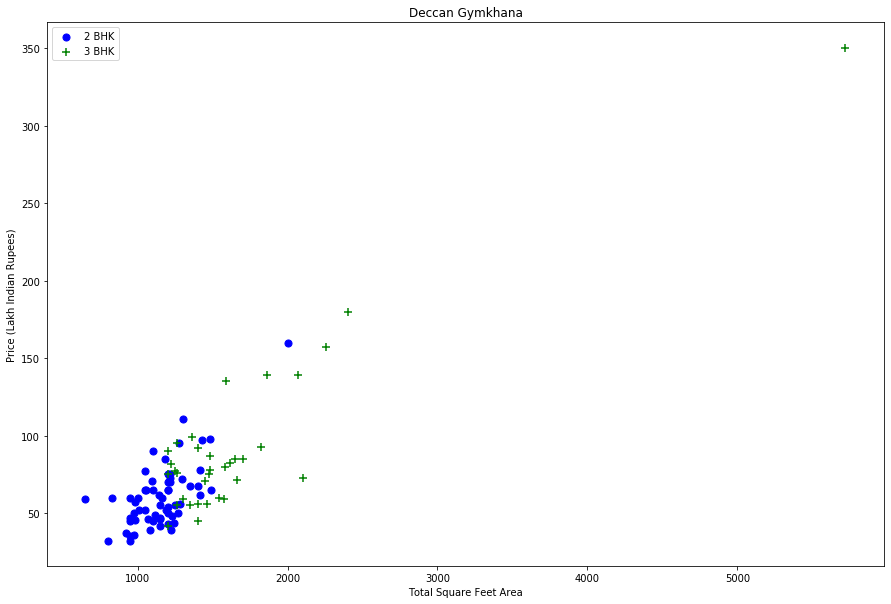

In [27]:
def plot_scatter_chart(df,site_location):
    bhk2 = df[(df.site_location==site_location) & (df.bhk==2)]
    bhk3 = df[(df.site_location==site_location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(site_location)
    plt.legend()
    
plot_scatter_chart(df,"Deccan Gymkhana")

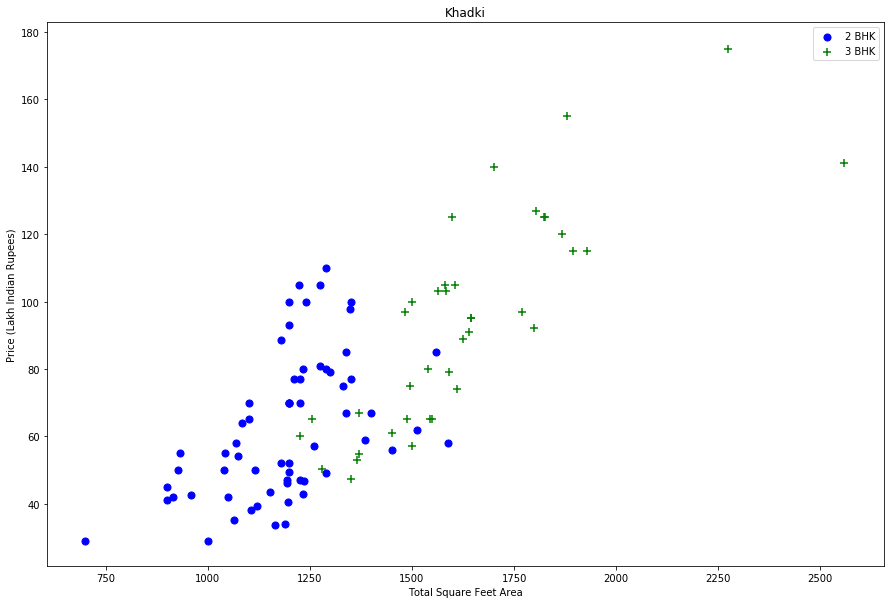

In [28]:
plot_scatter_chart(df,"Khadki")

In [29]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for site_location, location_df in df.groupby('site_location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bhk_outliers(df)
df.shape

(7543, 7)

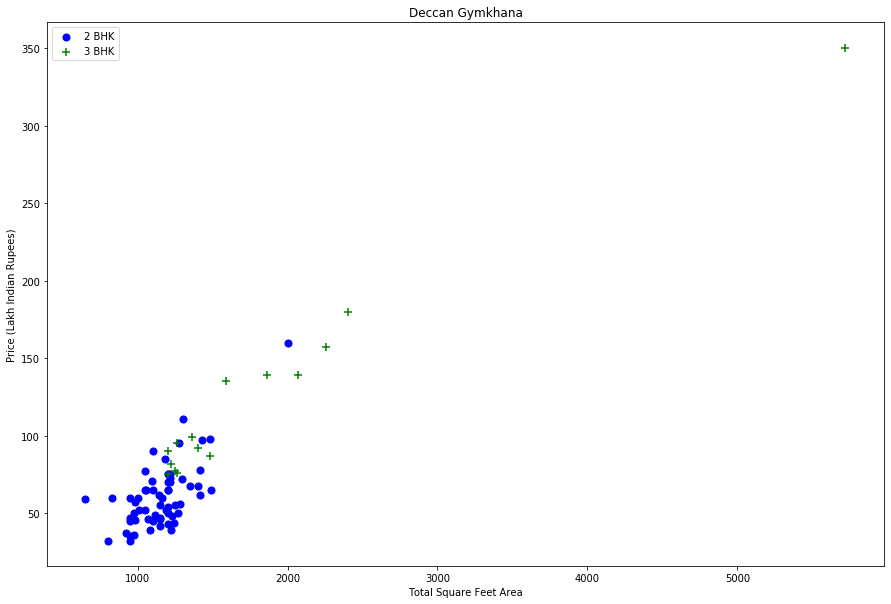

In [30]:
plot_scatter_chart(df,"Deccan Gymkhana")

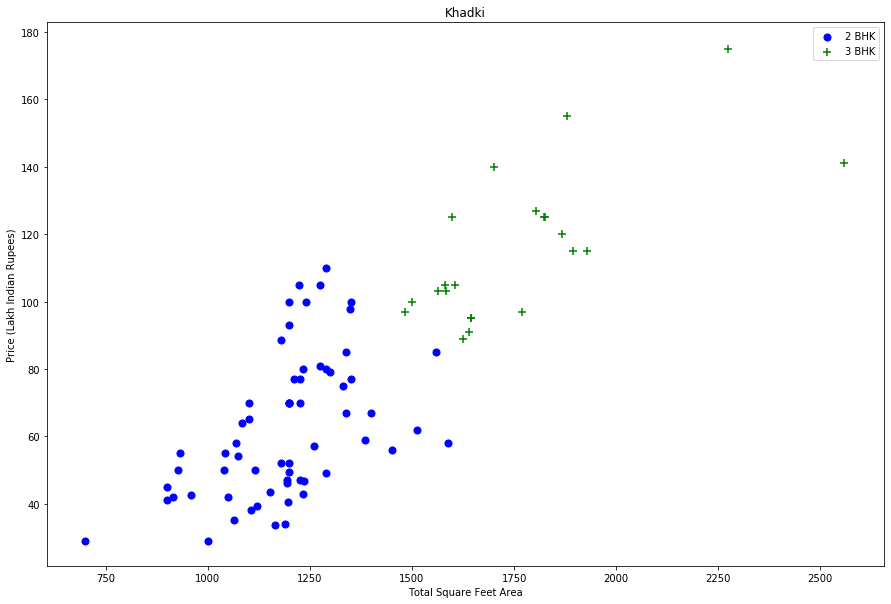

In [31]:
plot_scatter_chart(df,"Khadki")

Text(0, 0.5, 'Count')

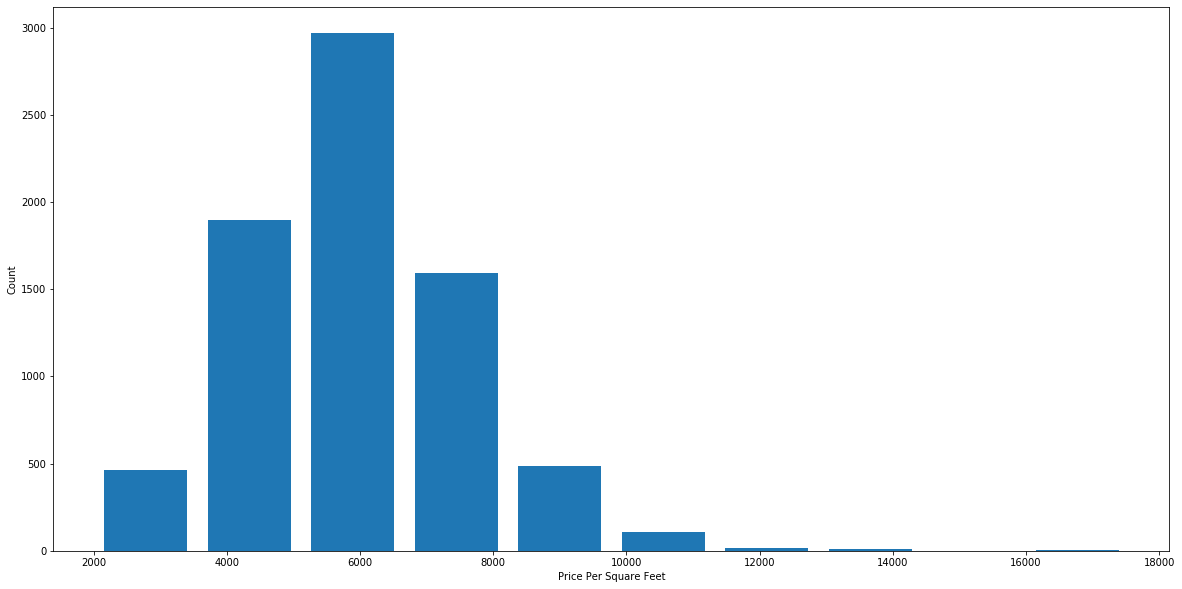

In [32]:
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(df.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [33]:
df.bath.unique()

array([ 2.,  4.,  3.,  5.,  9.,  1.,  6.,  7.,  8., 12., 13., 16.])

Text(0, 0.5, 'Count')

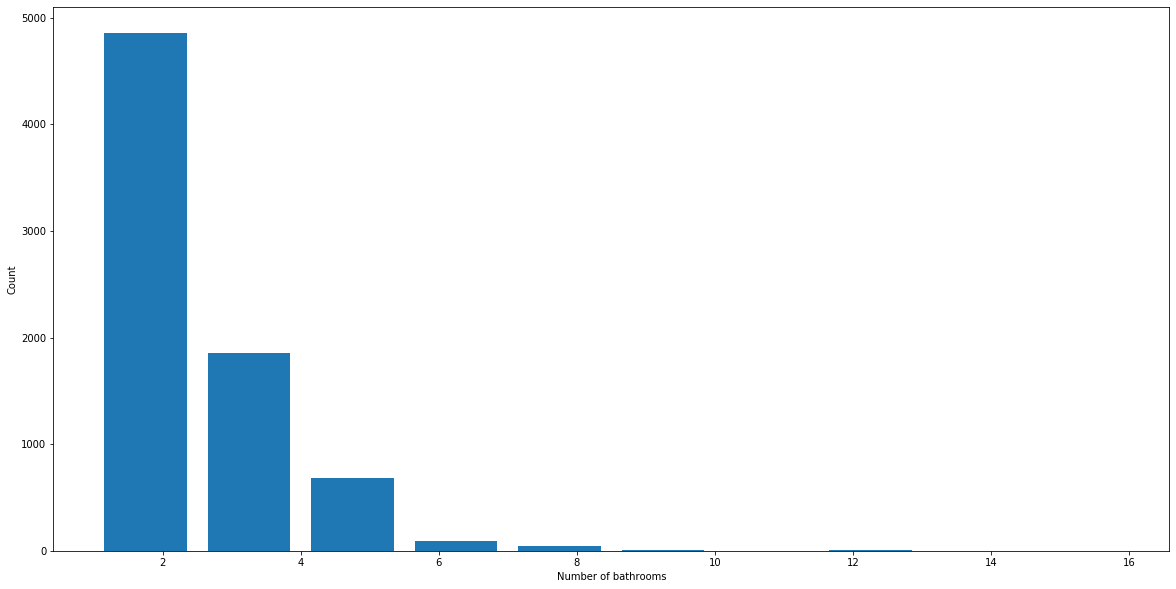

In [34]:
plt.hist(df.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [35]:
df[df.bath>10]

size  total_sqft  bath  price  site_location  bhk  price_per_sqft
1211   11 BHK      6000.0  12.0  150.0      Bibvewadi   11     2500.000000
2637   10 BHK     12000.0  12.0  525.0   Fatima Nagar   10     4375.000000
5265   13 BHK      5425.0  13.0  275.0  Kondhwa Khurd   13     5069.124424
6350   16 BHK     10000.0  16.0  550.0   Model colony   16     5500.000000
10389  10 BHK      4000.0  12.0  160.0        Wagholi   10     4000.000000

In [36]:
df[df.bath>df.bhk+2]

size  total_sqft  bath   price  site_location  bhk  price_per_sqft
772       3 BHK      1806.0   6.0   116.0          Baner    3     6423.034330
3067      6 BHK     11338.0   9.0  1000.0  Ghorpade Peth    6     8819.897689
4231  4 Bedroom      7000.0   8.0   450.0    Karve Nagar    4     6428.571429

In [37]:
df = df[df.bath<df.bhk+2]
df.shape

(7479, 7)

In [38]:
df.head()

size  total_sqft  bath   price site_location  bhk  price_per_sqft
0      2 BHK      1056.0   2.0   39.07   Alandi Road    2     3699.810606
1  4 Bedroom      2894.0   4.0  245.00   Alandi Road    4     8465.791292
2      2 BHK      1084.0   2.0   50.00   Alandi Road    2     4612.546125
3      2 BHK      1230.0   2.0   80.00   Alandi Road    2     6504.065041
4      3 BHK      1750.0   3.0  130.00   Alandi Road    3     7428.571429

In [39]:
df = df.drop(['size','price_per_sqft'],axis='columns')
df.head()

total_sqft  bath   price site_location  bhk
0      1056.0   2.0   39.07   Alandi Road    2
1      2894.0   4.0  245.00   Alandi Road    4
2      1084.0   2.0   50.00   Alandi Road    2
3      1230.0   2.0   80.00   Alandi Road    2
4      1750.0   3.0  130.00   Alandi Road    3

### Encoding

In [40]:
dummies = pd.get_dummies(df.site_location)
dummies.head()

Alandi Road  Ambegaon Budruk  Anandnagar  Aundh  Aundh Road  Balaji Nagar  \
0            1                0           0      0           0             0   
1            1                0           0      0           0             0   
2            1                0           0      0           0             0   
3            1                0           0      0           0             0   
4            1                0           0      0           0             0   

   Baner  Baner road  Bhandarkar Road  Bhavani Peth  ...  Uruli Devachi  \
0      0           0                0             0  ...              0   
1      0           0                0             0  ...              0   
2      0           0                0             0  ...              0   
3      0           0                0             0  ...              0   
4      0           0                0             0  ...              0   

   Vadgaon Budruk  Viman Nagar  Vishrant Wadi  Wadgaon Sheri  Wagholi  \
0               0            0              0              0        0   
1               0            0              0              0        0   
2               0            0              0              0        0   
3               0            0              0              0        0   
4               0            0              0              0        0   

   Wakadewadi  Wanowrie  Warje  Yerawada  
0           0         0      0         0  
1           0         0      0         0  
2           0         0      0         0  
3           0         0      0         0  
4           0         0      0         0  

[5 rows x 96 columns]

In [41]:
dff = pd.concat([df,dummies], axis='columns')

In [42]:
dff = dff.drop('site_location',axis='columns')
dff.head()

total_sqft  bath   price  bhk  Alandi Road  Ambegaon Budruk  Anandnagar  \
0      1056.0   2.0   39.07    2            1                0           0   
1      2894.0   4.0  245.00    4            1                0           0   
2      1084.0   2.0   50.00    2            1                0           0   
3      1230.0   2.0   80.00    2            1                0           0   
4      1750.0   3.0  130.00    3            1                0           0   

   Aundh  Aundh Road  Balaji Nagar  ...  Uruli Devachi  Vadgaon Budruk  \
0      0           0             0  ...              0               0   
1      0           0             0  ...              0               0   
2      0           0             0  ...              0               0   
3      0           0             0  ...              0               0   
4      0           0             0  ...              0               0   

   Viman Nagar  Vishrant Wadi  Wadgaon Sheri  Wagholi  Wakadewadi  Wanowrie  \
0            0              0              0        0           0         0   
1            0              0              0        0           0         0   
2            0              0              0        0           0         0   
3            0              0              0        0           0         0   
4            0              0              0        0           0         0   

   Warje  Yerawada  
0      0         0  
1      0         0  
2      0         0  
3      0         0  
4      0         0  

[5 rows x 100 columns]

In [43]:
dff.shape

(7479, 100)

In [44]:
X = dff.drop(['price'],axis='columns')
X.head()

total_sqft  bath  bhk  Alandi Road  Ambegaon Budruk  Anandnagar  Aundh  \
0      1056.0   2.0    2            1                0           0      0   
1      2894.0   4.0    4            1                0           0      0   
2      1084.0   2.0    2            1                0           0      0   
3      1230.0   2.0    2            1                0           0      0   
4      1750.0   3.0    3            1                0           0      0   

   Aundh Road  Balaji Nagar  Baner  ...  Uruli Devachi  Vadgaon Budruk  \
0           0             0      0  ...              0               0   
1           0             0      0  ...              0               0   
2           0             0      0  ...              0               0   
3           0             0      0  ...              0               0   
4           0             0      0  ...              0               0   

   Viman Nagar  Vishrant Wadi  Wadgaon Sheri  Wagholi  Wakadewadi  Wanowrie  \
0            0              0              0        0           0         0   
1            0              0              0        0           0         0   
2            0              0              0        0           0         0   
3            0              0              0        0           0         0   
4            0              0              0        0           0         0   

   Warje  Yerawada  
0      0         0  
1      0         0  
2      0         0  
3      0         0  
4      0         0  

[5 rows x 99 columns]

In [45]:
X.shape

(7479, 99)

In [46]:
y = df.price
y.head()

0     39.07
1    245.00
2     50.00
3     80.00
4    130.00
Name: price, dtype: float64

In [47]:
len(y)

7479

### Linear Regression

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [49]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8225341180112885

### Ensembling

In [50]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.87729294, 0.87158074, 0.82818963, 0.89763339, 0.81087542])

In [51]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\Ruthvik Pawar\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
C:\Users\Ruthvik Pawar\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_p

model  best_score  \
0  linear_regression    0.857114   
1              lasso    0.857851   
2      decision_tree    0.768528   

                                         best_params  
0                               {'normalize': False}  
1                {'alpha': 2, 'selection': 'random'}  
2  {'criterion': 'friedman_mse', 'splitter': 'ran...

In [52]:
X.columns

Index(['total_sqft', 'bath', 'bhk', 'Alandi Road', 'Ambegaon Budruk',
       'Anandnagar', 'Aundh', 'Aundh Road', 'Balaji Nagar', 'Baner',
       'Baner road', 'Bhandarkar Road', 'Bhavani Peth', 'Bibvewadi', 'Bopodi',
       'Budhwar Peth', 'Bund Garden Road', 'Camp', 'Chandan Nagar', 'Dapodi',
       'Deccan Gymkhana', 'Dehu Road', 'Dhankawadi', 'Dhayari Phata',
       'Dhole Patil Road', 'Erandwane', 'Fatima Nagar',
       'Fergusson College Road', 'Ganesh Peth', 'Ganeshkhind', 'Ghorpade Peth',
       'Ghorpadi', 'Gokhale Nagar', 'Gultekdi', 'Guruwar peth', 'Hadapsar',
       'Hadapsar Industrial Estate', 'Hingne Khurd', 'Jangali Maharaj Road',
       'Kalyani Nagar', 'Karve Nagar', 'Karve Road', 'Kasba Peth', 'Katraj',
       'Khadaki', 'Khadki', 'Kharadi', 'Kondhwa', 'Kondhwa Budruk',
       'Kondhwa Khurd', 'Koregaon Park', 'Kothrud', 'Law College Road',
       'Laxmi Road', 'Lulla Nagar', 'Mahatma Gandhi Road', 'Mangalwar peth',
       'Manik Bagh', 'Market yard', 'Model colony',

### Checking predictions for known locations

In [53]:
def predict_price(site_location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==site_location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [54]:
predict_price('Khadki',1000, 2, 2)

C:\Users\Ruthvik Pawar\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


52.99909973144531

In [55]:
predict_price('Deccan Gymkhana',1000, 2, 2)

C:\Users\Ruthvik Pawar\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


58.47178649902344

In [56]:
predict_price('Viman Nagar',1000, 2, 2)

C:\Users\Ruthvik Pawar\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


64.20479965209961

### Pickle

In [57]:
import pickle
with open('pune_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

### Json

In [58]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))